In [15]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
#read in featuresdf.csv and store in variable named music
music = pd.read_csv("/Users/Jerry/Documents/pyspark_data/spotify_data.csv")
#look at first five rows of dataset
music.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [17]:
#look at summary of dataset
music.describe(include="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
unique,100,100,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7GX5flRQZVHRAGd6B4TmD,Say You Won't Let Go,The Chainsmokers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,NaN,NaN,NaN,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,NaN,NaN,NaN,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,NaN,NaN,NaN,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,NaN,NaN,NaN,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,NaN,NaN,NaN,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00


In [18]:
#we'll start off by creating two datasets, numeric and small, with some values removed
numeric = music.drop(['id','name','artists'], axis=1)
#i'm removing the below values since all the other values range between 0.0 and 1.0
#the other values are much larger, making it hard to see these values
small = numeric.drop(['tempo','duration_ms','key','loudness','time_signature'], axis=1)

In [19]:
#set color palette to pastel
sns.set_palette('pastel')

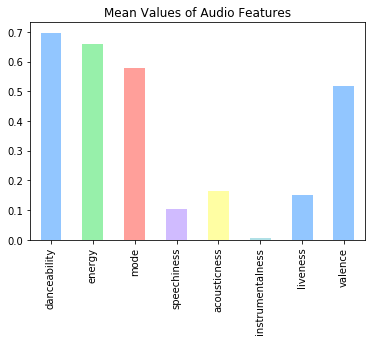

In [20]:
#create a bar chart of the mean values of the audio features in the small dataset
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

Mean value for danceability: 0.6968199999999999


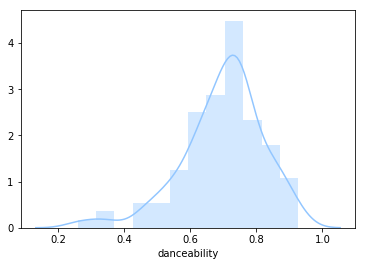

In [21]:
#mean value and distplot for danceability feature
print("Mean value for danceability:", music['danceability'].mean())
sns.distplot(music['danceability'])
plt.show()

Mean value for energy: 0.6606899999999999


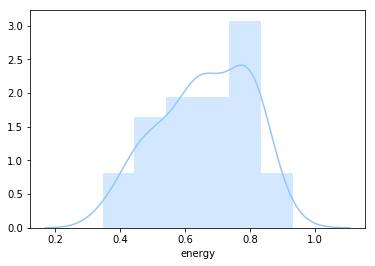

In [22]:
#mean value and distplot for energy feature
print("Mean value for energy:", music['energy'].mean())
sns.distplot(music['energy'])
plt.show()

In [23]:
#With a mean value of 0.697, it's clear that the majority of the top tracks have a high danceability rating.
#Conclusion: People like to stream songs they can dance to. I wonder if this says anything about when/where people stream songs? (Parties etc.?)

Mean value for energy:  0.6606899999999999


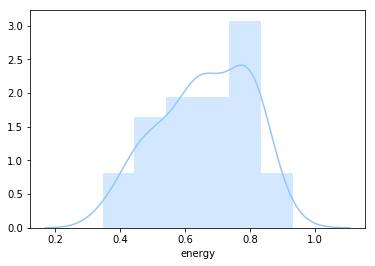

In [24]:
# mean values and distplot for energy feature
print("Mean value for energy: ", music['energy'].mean())
sns.distplot(music['energy'])
plt.show()

In [25]:
#Again, people seem like energetic songs more than calm ones (mean of 0.661), although this feature seems to be a bit more evenly distributed than danceability.
#Conclusion: People like energetic songs. I wonder what the ages of Spotify users are?

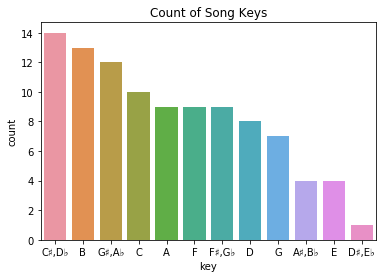

In [26]:
#map the numeric values of key to notes
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
music['key'] = music['key'].map(key_mapping)
sns.countplot(x = 'key', data=music, order=music['key'].value_counts().index)
plt.title("Count of Song Keys")
plt.show()

Mean value for loudness: -5.652649999999998


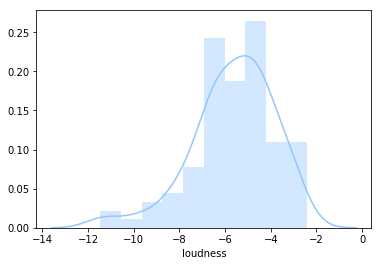

In [27]:
#mean value and distplot for loudness feature
print("Mean value for loudness:", music['loudness'].mean())
sns.distplot(music['loudness'])
plt.show()

Mean value for mode feature: 0.58


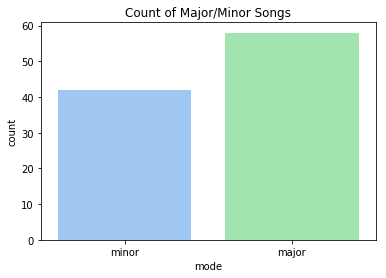

In [28]:
#print mean value for mode
print("Mean value for mode feature:", music['mode'].mean())

#map the binary value of mode to major/minor
mode_mapping = {1.0: "major", 0.0: "minor"}
music['mode'] = music['mode'].map(mode_mapping)

#draw a countplot of the values
sns.countplot(x = 'mode', data=music)
plt.title("Count of Major/Minor Songs")
plt.show()

In [29]:
# Conclusion: Major is preferred over minor.

Mean value for speechiness: 0.10396899999999995


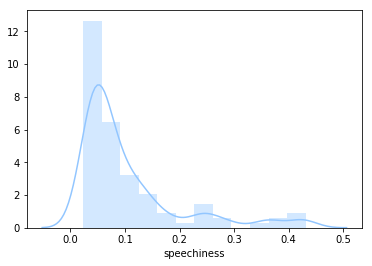

In [30]:
#mean value and distplot for speechiness feature
print("Mean value for speechiness:", music['speechiness'].mean())
sns.distplot(music['speechiness'])
plt.show()

In [31]:
#The mean value for speechiness is pretty low (only 0.104). 
#This indicates that people prefer actual music. (I wonder if rapping counts as spoken lyrics?)
#Conclusion: Actual music is more popular than, say, audiobooks.
#(Can't say I didn't see this coming..)

Mean value for acousticness: 0.16630649000000006


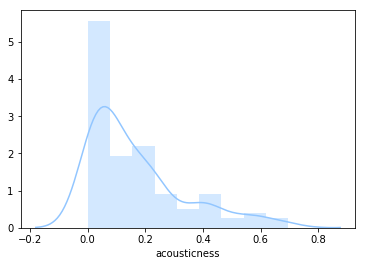

In [32]:
#mean value and distplot for acousticness feature
print("Mean value for acousticness:", music['acousticness'].mean())
sns.distplot(music['acousticness'])
plt.show()

In [33]:
#Once again, the mean value for acousticness is low at 0.166.
#Conclusion: People don't seem to stream acoustic songs as much non-acoustic ones. Sorry, acoustic covers!

Mean value for instrumentalness: 0.0047961442


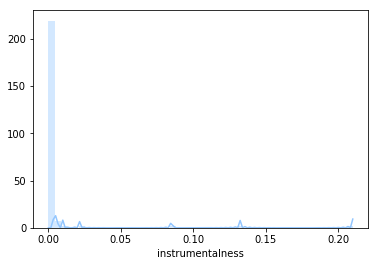

In [34]:
print("Mean value for instrumentalness:", music['instrumentalness'].mean())
sns.distplot(music['instrumentalness'])
plt.show()

In [35]:
#The mean value for instrumentalness is really, really low at 0.00479.
#Conclusion: People like songs that have lyrics.

Mean value for liveness:valen 0.15060700000000002


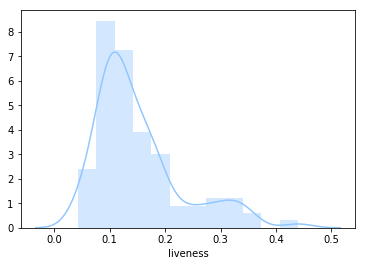

In [36]:
#mean value and distplot for liveness feature
print("Mean value for liveness:valen", music['liveness'].mean())
sns.distplot(music['liveness'])
plt.show()

In [37]:
#As expected, the mean value for liveness is pretty low at 0.151. I wouldn't expect people to listen to live music on Spotify with the audience cheering in the background.
#Conclusion: People like to listen to live music at concerts, not on Spotify.

Mean value for valence feature: 0.5170489999999999


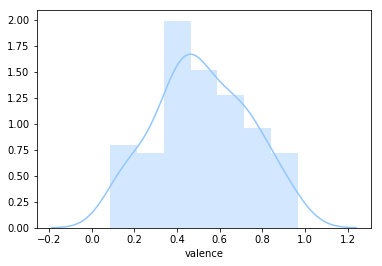

In [38]:
#mean value and distplot for valence feature
print('Mean value for valence feature:', music['valence'].mean())
sns.distplot(music['valence'])
plt.show()

In [39]:
#Happy and sad songs are actually pretty evenly distributed at 0.517.
#Conclusion: Some days are happy, some days are sad. Music reflects that.

Mean value for tempo feature: 119.20245999999996


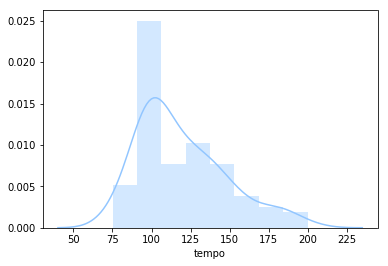

In [40]:
#mean value and distplot for tempo feature
print('Mean value for tempo feature:', music['tempo'].mean())
sns.distplot(music['tempo'])
plt.show()

In [41]:
#The mean value for tempo is 119.202 bpm, which is actually pretty fast.
#Conclusion: People like fast songs more than slow ones.

Mean value for duration_ms feature: 218387.28


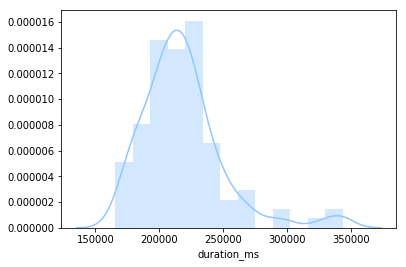

In [42]:
#mean value and distplot for duration_ms feature
print('Mean value for duration_ms feature:', music['duration_ms'].mean())
sns.distplot(music['duration_ms'])
plt.show()

In [43]:
#The mean value for duration is 218387 milliseconds, which is around 3 minutes and 38 seconds.
#Conclusion: People don't like it when songs are too short or too long. (Duh - although I'd say that 3 mins and 38 secs is pretty long already)

Mean value for time_signature feature: 3.99


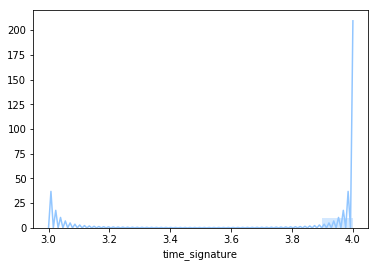

In [44]:
#mean value and distplot for time_signature feature
print('Mean value for time_signature feature:', music['time_signature'].mean())
sns.distplot(music['time_signature'])
plt.show()

In [45]:
#Basically all the songs in the playlist are 4/4.
#Conclusion: People really like songs that are 4/4? (I wonder if we subconsciously notice this or something.)

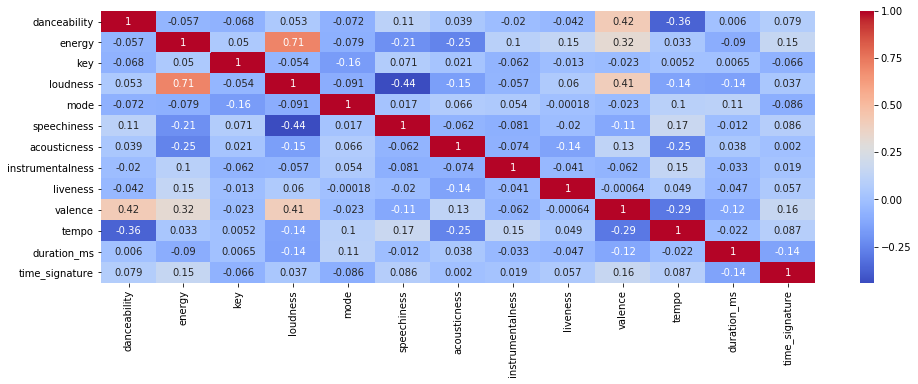

In [46]:
plt.figure(figsize = (16,5))
sns.heatmap(numeric.corr(), cmap="coolwarm", annot=True)
plt.show()

In [33]:
#Energy and loudness seem to be pretty correlated, 
#which is not surprising. What I did find surprising is 
#that there seems to be little correlation between energy and danceability